In [23]:
##Basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##modeling dependencies
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('student.csv')

In [27]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


# Preparing the X and Y variable

In [28]:
x=df.drop('math score',axis=1)
y=df['math score']

In [30]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

# Column transformer for categorical variable

In [34]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

##categorical features
cat_feat=x.select_dtypes(include='object').columns
num_feat=x.select_dtypes(exclude='object').columns

##create instances of the transformers
ohe=OneHotEncoder()
scaler=StandardScaler()

##preprocessing
preprocess_pipeline=ColumnTransformer([
                                      ('one hot encoding',ohe,cat_feat),
                                      ('Standard Scaler',scaler,num_feat)
])


In [36]:
x_trans=preprocess_pipeline.fit_transform(x)

In [38]:
x_trans

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.3438146 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.02170075],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.7473056 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19442421],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46030435],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.0687177 ]], shape=(1000, 21))

# Train test splitting

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_trans,y,test_size=.2,random_state=42)

x_train.shape,x_test.shape


((800, 21), (200, 21))

## User define function to predict 

In [54]:
##user define function to evaluate the model
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    r2score=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mse,rmse,mae,r2score

# Model training

In [59]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'SVR':SVR(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'xgboost':XGBRegressor(),
    'K Neighbors Regressor':KNeighborsRegressor()
}

model_list=[]
r_2score=[]

for i in range(len(models)):
    model=list(models.values())[i] ##models.values() gives values only for key-value pair
    model.fit(x_train,y_train) ##train model

    ##prediction
    y_train_pred=model.predict(x_train) ##prediction on training set
    y_test_pred=model.predict(x_test) ##prediction on test set

    ##evaluate the model
    mse_train,rmse_train,mae_train,r2score_train=evaluate_model(y_train, y_train_pred)
    mse_test,rmse_test,mae_test,r2score_test=evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print('Mean squared error is ', mse_train)
    print('Root Mean Square error is ',rmse_train)
    print('R2 square is ', r2score_train)
    print('Mean Absolute error is', mae_train)

    print('-----------------------------------------')

    print('Model Performance for Test set')
    print('Mean squared error is ', mse_test)
    print('Root Mean Square error is ',rmse_test)
    print('R2 square is ', r2score_test)
    print('Mean Absolute error is', mae_test)
    r_2score.append(r2score_test)

    print('*'*35,'\n')

Linear Regression
Model Performance for Training set
Mean squared error is  1.828895122664394e-27
Root Mean Square error is  4.276558338973518e-14
R2 square is  1.0
Mean Absolute error is 3.4177105590060816e-14
-----------------------------------------
Model Performance for Test set
Mean squared error is  1.8935186080200992e-27
Root Mean Square error is  4.3514579258222174e-14
R2 square is  1.0
Mean Absolute error is 3.3644198538240746e-14
*********************************** 

Ridge
Model Performance for Training set
Mean squared error is  0.11531699574658165
Root Mean Square error is  0.33958356224437847
R2 square is  0.9994884973089541
Mean Absolute error is 0.272274317903116
-----------------------------------------
Model Performance for Test set
Mean squared error is  0.11831327722155463
Root Mean Square error is  0.34396697112012753
R2 square is  0.9995137911763143
Mean Absolute error is 0.2689558802747143
*********************************** 

Lasso
Model Performance for Training 

In [65]:
result=pd.DataFrame(list(zip(model_list,r_2score)),columns=['Models','r2 score']).sort_values(by=['r2 score'],ascending=False)

In [66]:
result

,Models,r2 score
0,Linear Regression,1.000000
1,Ridge,0.999514
7,xgboost,0.977101
4,Random Forest Regressor,0.963144
5,Decision Tree Regressor,0.935892
6,AdaBoost Regressor,0.926122
2,Lasso,0.908561
8,K Neighbors Regressor,0.889781
3,SVR,0.794029


# Linear Regression

In [69]:
lm=LinearRegression(fit_intercept=True)
lm.fit(x_train,y_train)
y_predl=lm.predict(x_test)
score=r2_score(y_test,y_predl)*100

print('R2 score for Linear Regression is ',score)

R2 score for Linear Regression is  100.0


## Plot y_test and y_pred

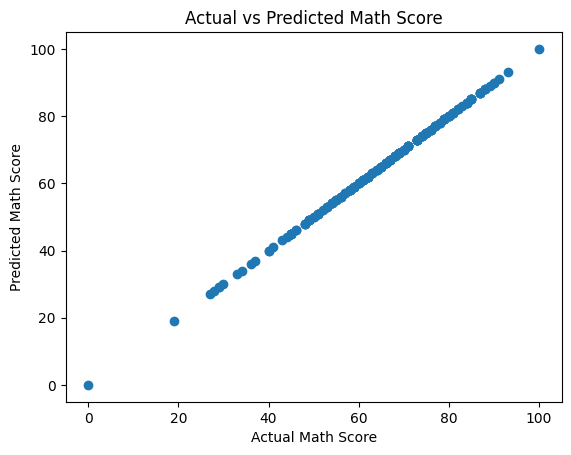

In [70]:
plt.scatter(y_test,y_predl)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.show()

<Axes: xlabel='math score'>

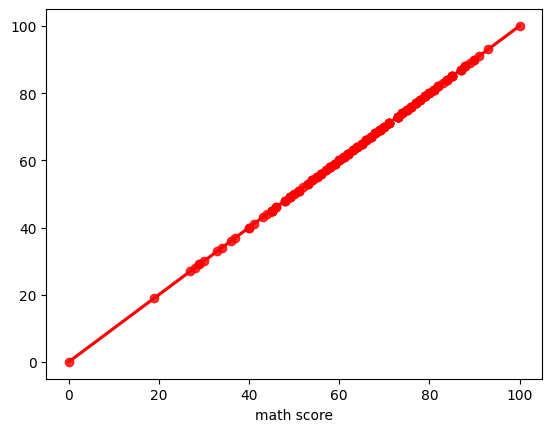

In [72]:
sns.regplot(x=y_test,y=y_predl,ci=None,color='red')

## Difference between Actual and Predicted

In [73]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_predl,'Difference':y_test-y_predl})
df

,Actual,Predicted,Difference
521,91,91.0,-2.842171e-14
737,53,53.0,0.000000e+00
740,80,80.0,-1.421085e-14
660,74,74.0,-2.842171e-14
411,84,84.0,-5.684342e-14
...,...,...,...
408,52,52.0,4.263256e-14
332,62,62.0,2.842171e-14
208,74,74.0,-1.421085e-14
613,65,65.0,0.000000e+00
